<a href="https://colab.research.google.com/github/zuls/WSI/blob/main/WSI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!apt-get update -qq
!apt-get install -y openslide-tools
!pip install openslide-python

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
openslide-tools is already the newest version (3.4.1+dfsg-5build1).
0 upgraded, 0 newly installed, 0 to remove and 42 not upgraded.


In [3]:
import openslide
from openslide import open_slide
from openslide.deepzoom import DeepZoomGenerator

from PIL import Image
Image.MAX_IMAGE_PIXELS = None

import numpy as np
import matplotlib.pyplot as plt

# --- Resources for Free Whole Slide Image Samples ---
# 1. OpenSlide Test Data: This is a good starting point for small, manageable test images.
#    You can find several `.svs` files here: https://openslide.cs.cmu.edu/download/openslide-testdata/
#    For example, `CMU-1.svs` is a common choice.
#    To download in Colab, you could use: `!wget https://openslide.cs.cmu.edu/download/openslide-testdata/openslide-testdata-standard/CMU-1.svs`

# 2. The Cancer Imaging Archive (TCIA): Offers large collections of medical images, including WSIs.
#    Website: https://www.cancerimagingarchive.net/
#    You'll need to navigate their datasets to find specific WSI collections.

# 3. Publicly available datasets from research institutions or competitions (e.g., Kaggle).
#    Search for 'WSI datasets' or 'whole slide imaging datasets' on platforms like Kaggle or Google Dataset Search.

# Once you download a file (e.g., 'sample.svs'), you can then open it like this:
# slide = openslide.open_slide('path/to/your/sample.svs')

In [4]:
!wget https://openslide.cs.cmu.edu/download/openslide-testdata/Aperio/CMU-1.svs

--2025-11-23 20:17:40--  https://openslide.cs.cmu.edu/download/openslide-testdata/Aperio/CMU-1.svs
Resolving openslide.cs.cmu.edu (openslide.cs.cmu.edu)... 128.2.209.93
Connecting to openslide.cs.cmu.edu (openslide.cs.cmu.edu)|128.2.209.93|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 177552579 (169M) [image/tiff]
Saving to: ‘CMU-1.svs.1’

CMU-1.svs.1         100%[===================>] 169.33M  11.6MB/s    in 21s     

2025-11-23 20:18:02 (8.22 MB/s) - ‘CMU-1.svs.1’ saved [177552579/177552579]



In [5]:
slide = openslide.open_slide('CMU-1.svs')

In [6]:
slide.dimensions

(46000, 32914)

(np.float64(-0.5), np.float64(499.5), np.float64(357.5), np.float64(-0.5))

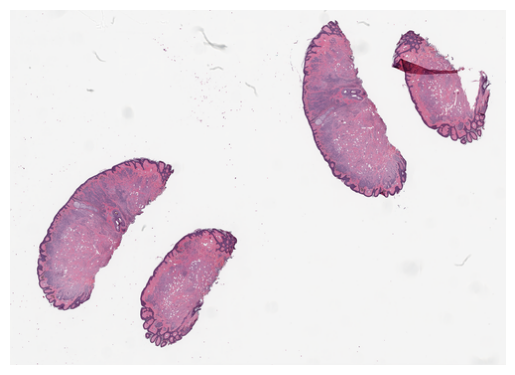

In [8]:
thumbnail = slide.get_thumbnail((500, 500))
plt.imshow(thumbnail)
plt.axis('off')
#plt.title(f"Thumbnail (Max 500x500) of {slide.dimensions[0]}x{slide.dimensions[1]} image")